<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/MNIST_image_dataset_LSTM_RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST IMAGE DATASET CLASSIFICATION USING RNN AND LSTM

In [0]:
pip install tensorflow==1.4 #downgrade tensorflow to 1.4 to use function like keras placeholder

In [0]:
pip uninstall keras

In [0]:
pip install keras==2.1.5 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [0]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


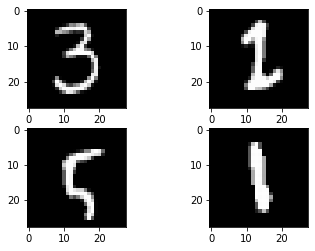

In [6]:
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[50], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[70], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
#Reshape images 

x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
print(x_train[0].shape)

(28, 28)


In [10]:
x_train.shape[1:]

(28, 28)

In [0]:
#Build LSTM model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
num_classes = 10                   #(10 digits here from 0 to 10)

In [0]:
model = Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #use softmax for multiclass classification, #10 = number of classes

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #use sparse categorical croosentropy in multiclass classification when classes are as integers

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [17]:
pip install h5py

In [0]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

mc = ModelCheckpoint('best_LSTM_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [19]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[es, mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.6771 - acc: 0.7771 - val_loss: 0.1338 - val_acc: 0.9620

Epoch 00001: val_loss improved from inf to 0.13381, saving model to best_LSTM_model.h5
Epoch 2/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1683 - acc: 0.9559 - val_loss: 0.0778 - val_acc: 0.9775

Epoch 00002: val_loss improved from 0.13381 to 0.07781, saving model to best_LSTM_model.h5
Epoch 3/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1167 - acc: 0.9696 - val_loss: 0.0730 - val_acc: 0.9775

Epoch 00003: val_loss improved from 0.07781 to 0.07305, saving model to best_LSTM_model.h5
Epoch 4/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0888 - acc: 0.9766 - val_loss: 0.0549 - val_acc: 0.9842

Epoch 00004: val_loss improved from 0.07305 to 0.05491, saving model to best_LSTM_model.h5
Epoch 5/20
60000/60000 [==========

In [0]:
from keras.models import load_model

saved_model = load_model('best_LSTM_model.h5')

In [24]:
test_accuracy = saved_model.evaluate(x_test, y_test, verbose=0)

print("Test accuracy: %3f=", test_accuracy)

Test accuracy: %3f= [0.05490595211304026, 0.9842]


###Testing trained model on a new image

In [28]:
img = x_test[650]
test_img = img.reshape((1,28,28))
img_class = saved_model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  6


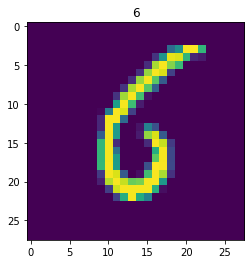

In [29]:
#Display the predicted image

img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()